# AICE Professional 특강 - 이미지 실습
+ 본과정에서는 꽃 이미지 데이터를 가지고 이미지 모델을 만들고
 분류 실습하겠습니다.
+ 첫번째로, 이미지 파일 읽고 , 라벨정보도 만들어 데이터셋을 생성하고
+ 만들어진 데이터셋을 활용하여 CNN 모델 학습하고 평가하겠습니다.
+ 두번째로, 이미지 파일 읽고, 라벨정보 만드는 작업을 Keras의 image_dataset_from_directory 함수 활용하여
+ 데이터셋을 만들고 CNN 모델 학습 및 평가 하겠습니다.
+ 세번째로, MobileNet Transfer Learning(전이학습)으로 모델 학습 및 평가 진행하겠습니다.

<br>
<br>



### 학습목차

#### A. 라벨정보 포함한 이미지 데이터셋 만들기
1. 필요한 라이브러리 임포트
2. 이미지 파일 가져오기
3. os.listdir과 PIL.Image 이용하여 이미지 읽기
4. 이미지 라벨링 포함해서 Class별 이미지 리스트 만들기
5. Train/Test 데이터셋 만들기

#### B. Build Model
1. Build Model
2. Callback
3. 모델 학습
4. 성능 그래프
5. Predict

#### C. image_dataset_from_directory 이용하여 데이터셋 만들기
1. 필요한 라이브러리 임포트
2. 이미지 파일 가져오기
3. 이미지 파일 하나 읽어 이미지 보기
4. Data Preprocess : image_dataset_from_directory 이용하여 한번에 처리

#### D. 모델링
1. Build Model : Functional API
2. Callback
3. 모델 학습
4. 성능 그래프
5. Predict

#### E. MobileNet Transfer Learning & Fine-tuning 모델링



<br>
<br>
<br>

## A. 라벨정보 포함한 이미지 데이터셋 만들기

### 1.필요한 라이브러리 임포트

In [ ]:
import os
from glob import glob
from PIL import Image

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

### 2.이미지 파일 가져오기

In [ ]:
# 약 3,700장의 꽃 사진 데이터세트를 사용합니다.
# 아래 데이터 가져오기 그냥 사용합니다.

import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 2s 0us/step


In [ ]:
# 이미지 패스 확인
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [ ]:
# 이미지 폴더 밑의 폴더 확인

!ls -l /root/.keras/datasets/flower_photos/

total 620
drwx------ 2 270850 5000  36864 Feb 10  2016 daisy
drwx------ 2 270850 5000  53248 Feb 10  2016 dandelion
-rw-r----- 1 270850 5000 418049 Feb  9  2016 LICENSE.txt
drwx------ 2 270850 5000  36864 Feb 10  2016 roses
drwx------ 2 270850 5000  36864 Feb 10  2016 sunflowers
drwx------ 2 270850 5000  40960 Feb 10  2016 tulips


In [ ]:
# daisy 폴더 안의 이지미 갯수
!ls -l /root/.keras/datasets/flower_photos/daisy | grep jpg | wc -l

633


In [ ]:
# dandelion 폴더 안의 이지미 갯수
!ls -l /root/.keras/datasets/flower_photos/dandelion | grep jpg | wc -l

898


In [ ]:
# roses 폴더 안의 이지미 갯수
!ls -l /root/.keras/datasets/flower_photos/roses | grep jpg | wc -l

641


In [ ]:
# sunflowers 폴더 안의 이지미 갯수
!ls -l /root/.keras/datasets/flower_photos/sunflowers | grep jpg | wc -l

699


In [ ]:
# tulips 폴더 안의 이지미 갯수
!ls -l /root/.keras/datasets/flower_photos/tulips | grep jpg | wc -l

799


### 3. os.listdir과 PIL.Image 이용하여 이미지 읽기

In [ ]:
# 이미지 패스 지정
daisy_path = '/root/.keras/datasets/flower_photos/daisy/'
dandelion_path = '/root/.keras/datasets/flower_photos/dandelion/'
roses_path = '/root/.keras/datasets/flower_photos/roses/'
sunflowers_path = '/root/.keras/datasets/flower_photos/sunflowers/'
tulips_path = '/root/.keras/datasets/flower_photos/tulips/'

In [ ]:
# 이미지 패스의 파말 리스트 만들기
daisy_file = os. [칸 채우기] (daisy_path)
dandelion_file = os.listdir(dandelion_path)
roses_file = os.listdir(roses_path)
sunflowers_file = os.listdir(sunflowers_path)
tulips_file = os.listdir(tulips_path)

In [ ]:
# 이미지 파일 리스트 읽어보기
daisy_file[:2], roses_file[:2]

(['4432271543_01c56ca3a9.jpg', '20289938802_e16fa9f23d.jpg'],
 ['14683774134_6367640585.jpg', '3045046293_57f6d52065_m.jpg'])

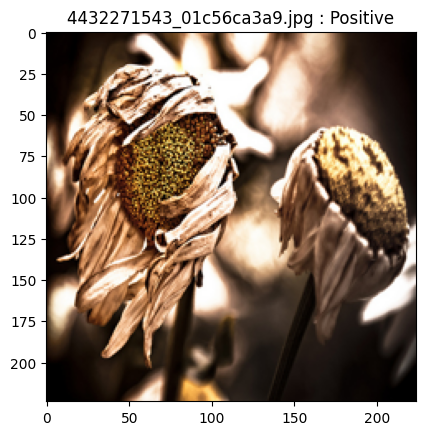

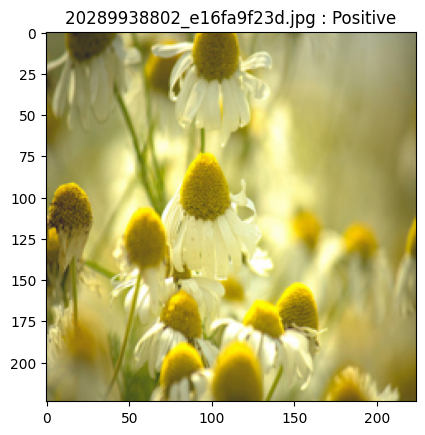

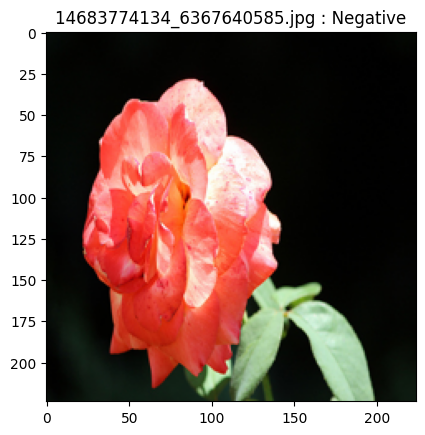

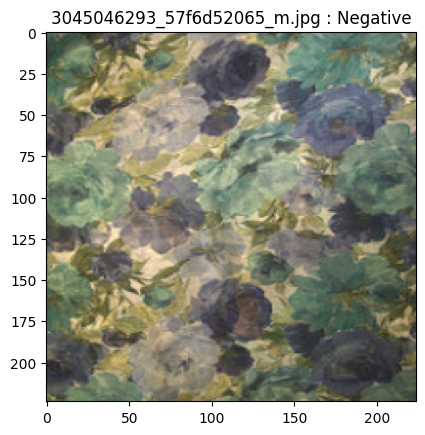

In [ ]:
# 위의 파일 리스트에서 2개씩 읽고 이미지 출력하기
for img_file in daisy_file[:2] :
    img = Image. [칸 채우기] (daisy_path + img_file). [칸 채우기] ((224,224))
    plt.title(img_file + ' : daisy')
    plt.imshow(img)
    plt.show()

for img_file in roses_file[:2] :
    img = Image.open(roses_path + img_file).resize((224,224))
    plt.title(img_file + ' : roses')
    plt.imshow(img)
    plt.show()

### 4. 이미지 라벨링 포함해서 Class별 이미지 리스트 만들기

In [ ]:
# Class 라벨 정의

class2idx = {'daisy' :  0, 'dandelion' : 1,  'roses' : 2, 'sunflowers' : 3, 'tulips' : 4}
idx2class = {0 : 'daisy', 1 : 'dandelion', 2 : 'roses', 3 : 'sunflowers', 4 : 'tulips'}


In [ ]:
# 수작업으로 이미지 리스트와 라벨 리스트 만들기

img_list = []
label_list = []

daisy_file = os. [칸 채우기] (daisy_path)
for img_file in daisy_file :
  img = Image. [칸 채우기] (daisy_path + img_file). [칸 채우기] ((128,128))
  img = [칸 채우기] (img)/255.  # 이미지 스케일링
  img_list.append(img)
  label_list.append(0) # daisy : 0

dandelion_file = os.listdir(dandelion_path)
for img_file in dandelion_file :
  img = Image.open(dandelion_path + img_file).resize((128,128))
  img = np.array(img)/255.  # 이미지 스케일링
  img_list.append(img)
  label_list.append(1) # dandelion : 1

roses_file = os.listdir(roses_path)
for img_file in roses_file :
  img = Image.open(roses_path + img_file).resize((128,128))
  img = np.array(img)/255.  # 이미지 스케일링
  img_list.append(img)
  label_list.append(2) # roses : 2

sunflowers_file = os.listdir(sunflowers_path)
for img_file in sunflowers_file :
  img = Image.open(sunflowers_path + img_file).resize((128,128))
  img = np.array(img)/255.  # 이미지 스케일링
  img_list.append(img)
  label_list.append(3) # sunflowers : 2

tulips_file = os.listdir(tulips_path)
for img_file in tulips_file :
  img = Image.open(tulips_path + img_file).resize((128,128))
  img = np.array(img)/255.  # 이미지 스케일링
  img_list.append(img)
  label_list.append(4) # tulips : 2

In [ ]:
# 이미지 리스트, 라벨 리스트루 numpy array 변경
img_list_arr =  [칸 채우기] (img_list)
label_list_arr = np.array(label_list)

In [ ]:
# 이미지 리스트, 라벨 리스트 shape 확인
img_list_arr.shape, label_list_arr.shape

((3670, 128, 128, 3), (3670,))

### 5. Train/Test 데이터셋 만들기

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test =  [칸 채우기] (img_list_arr, label_list_arr, test_size=0.3, stratify=label_list_arr, random_state=41)
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((2569, 128, 128, 3), (1101, 128, 128, 3), (2569,), (1101,))

## B. Build Model

### 1. Build Model

In [ ]:
# Hyperparameter Tunning

num_epochs = 10
batch_size = 32

learning_rate = 0.001
dropout_rate = 0.5

input_shape = (128, 128, 3)  # 사이즈 확인

In [ ]:
# Sequential 모델 정의
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = [칸 채우기] ()
model.add( [칸 채우기] (32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=input_shape))
model.add( [칸 채우기] (pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(64,(2,2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation=' [칸 채우기] '))

In [ ]:
# 모델 컴파일
model. [칸 채우기] (optimizer=tf.keras.optimizers.Adam(learning_rate),  # Optimization
              loss='sparse_categorical_crossentropy',  # Loss Function
              metrics=['accuracy'])  # Metrics / Accuracy

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 flatten (Flatten)           (None, 65536)             0

### 2. Callback

In [ ]:
# callback : EarlyStopping, ModelCheckpoint

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# EarlyStopping
es = [칸 채우기] (monitor='val_loss', mode='min', verbose=1, patience=5)

# ModelCheckpoint
checkpoint_path = "my_checkpoint.ckpt"
checkpoint = [칸 채우기] (filepath=checkpoint_path,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=1)


### 3. 모델 학습

In [ ]:
# num_epochs = 10
# batch_size = 32

# 모델 학습(fit)
history = model. [칸 채우기] (
    X_train, y_train ,
    validation_data=(X_test, y_test),
    epochs=num_epochs,
    batch_size=batch_size,
    callbacks=[es, checkpoint]
)

Epoch 1/10
81/81 [==============================] - ETA: 0s - loss: 1.7265 - accuracy: 0.2947
Epoch 1: val_loss improved from inf to 1.31345, saving model to my_checkpoint.ckpt
81/81 [==============================] - 10s 56ms/step - loss: 1.7265 - accuracy: 0.2947 - val_loss: 1.3135 - val_accuracy: 0.4678
Epoch 2/10
81/81 [==============================] - ETA: 0s - loss: 1.2690 - accuracy: 0.4714
Epoch 2: val_loss improved from 1.31345 to 1.12453, saving model to my_checkpoint.ckpt
81/81 [==============================] - 5s 61ms/step - loss: 1.2690 - accuracy: 0.4714 - val_loss: 1.1245 - val_accuracy: 0.5441
Epoch 3/10
81/81 [==============================] - ETA: 0s - loss: 1.1042 - accuracy: 0.5601
Epoch 3: val_loss improved from 1.12453 to 1.04925, saving model to my_checkpoint.ckpt
81/81 [==============================] - 3s 39ms/step - loss: 1.1042 - accuracy: 0.5601 - val_loss: 1.0492 - val_accuracy: 0.5777
Epoch 4/10
79/81 [============================>.] - ETA: 0s - loss: 0.

### 4. 성능 그래프

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

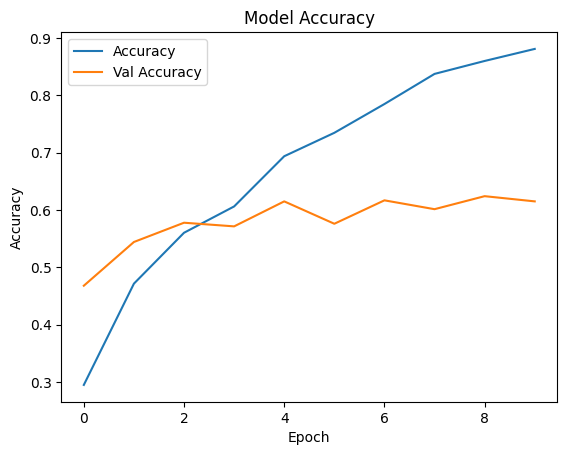

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

### 5. Predict

1/1 [==============================] - 0s 46ms/step


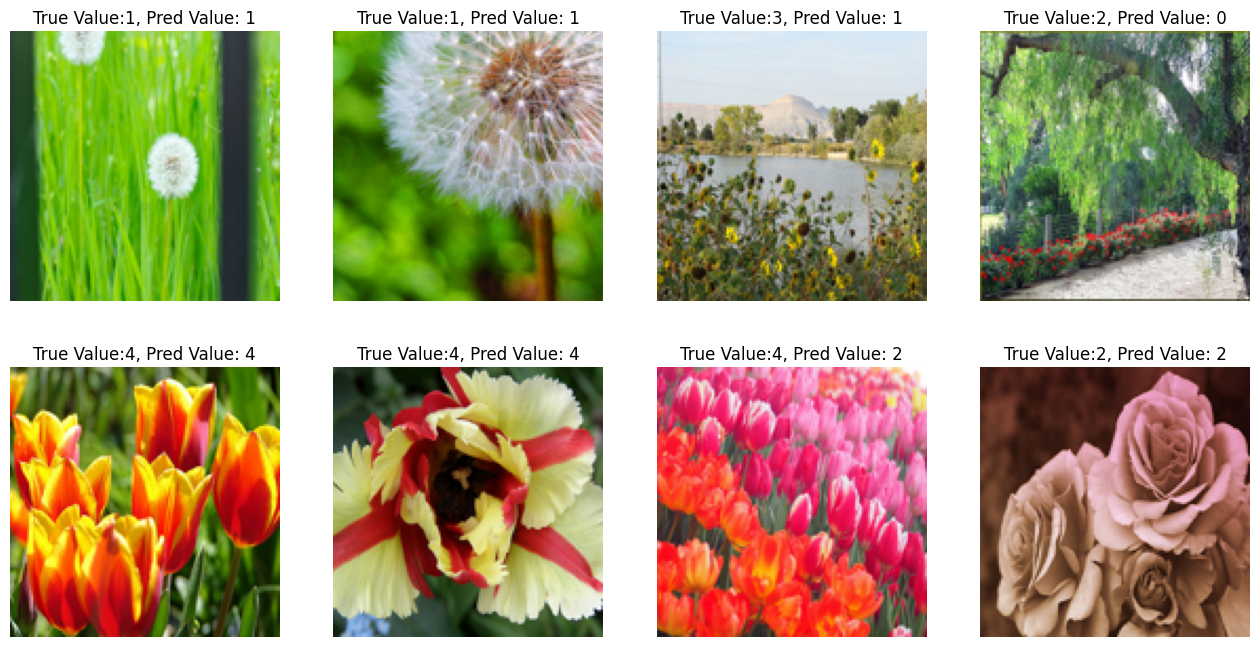

In [ ]:
# Test 데이터로 성능 예측하기

i=1
plt.figure(figsize=(16, 8))
for img, label in zip(X_test[:8], y_test[:8]):
      # 모델 예측(predict)
      pred = model. [칸 채우기] (img.reshape(-1,128, 128, 3))
      pred_t = np.argmax(pred)
      plt.subplot(2, 4, i)
      plt.title(f'True Value:{label}, Pred Value: {pred_t}')
      plt.imshow(img)
      plt.axis('off')
      i = i + 1

## 배운 내용 정리
1. os.listdir과 PIL.Image 활용해서 이미지 Dataset 만들어 보았습니다.
2. os.listdir과 PIL.Image 함수를 이용하여 필요한 데이터를 읽어오고
3. 리스트에 하나씩 넣어주면서 같이 라벨링도 라벨링에 넣어 주었습니다.
4. 이미지 리스트와 라벨 리스트를 numpy array로 변경후 학습 테이더셋과 검증 테이터 셋으로 나눠어 주었습니다.
5. 이후 , CNN 모델을 만들고 학습하고 평가해 보았습니다.
8. 약간의 수작업이 있었는데, 이런식으로 데이터셋 구성 및 모델을 만들수 있었습니다.

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## C.image_dataset_from_directory 이용하여 데이터셋 만들기

### 1.필요한 라이브러리 임포트

In [ ]:
from glob import glob
import os
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

### 2.이미지 파일 가져오기

In [ ]:
# 약 3,700장의 꽃 사진 데이터세트를 사용합니다.
# 아래 데이터 가져오기 그냥 사용합니다.

import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [ ]:
# 이미지 패스 확인
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [ ]:
# 이미지 폴더 밑의 폴더 확인

!ls -l /root/.keras/datasets/flower_photos/

total 620
drwx------ 2 270850 5000  36864 Feb 10  2016 daisy
drwx------ 2 270850 5000  53248 Feb 10  2016 dandelion
-rw-r----- 1 270850 5000 418049 Feb  9  2016 LICENSE.txt
drwx------ 2 270850 5000  36864 Feb 10  2016 roses
drwx------ 2 270850 5000  36864 Feb 10  2016 sunflowers
drwx------ 2 270850 5000  40960 Feb 10  2016 tulips


In [ ]:
# daisy 폴더 안의 이지미 갯수
!ls -l /root/.keras/datasets/flower_photos/daisy | grep jpg | wc -l

633


In [ ]:
# dandelion 폴더 안의 이지미 갯수
!ls -l /root/.keras/datasets/flower_photos/dandelion | grep jpg | wc -l

898


In [ ]:
# roses 폴더 안의 이지미 갯수
!ls -l /root/.keras/datasets/flower_photos/roses | grep jpg | wc -l

641


In [ ]:
# sunflowers 폴더 안의 이지미 갯수
!ls -l /root/.keras/datasets/flower_photos/sunflowers | grep jpg | wc -l

699


In [ ]:
# tulips 폴더 안의 이지미 갯수
!ls -l /root/.keras/datasets/flower_photos/tulips | grep jpg | wc -l

799


###  3. 이미지 파일 하나 읽어 이미지 보기

In [ ]:
# 이미지 패스 지정
daisy_path = '/root/.keras/datasets/flower_photos/daisy/'

In [ ]:
# 이미지 패스의 파말 리스트 만들기
daisy_file = os.listdir(daisy_path)

In [ ]:
# 이미지 파일 리스트 읽어보기
daisy_file[:2]

['4432271543_01c56ca3a9.jpg', '20289938802_e16fa9f23d.jpg']

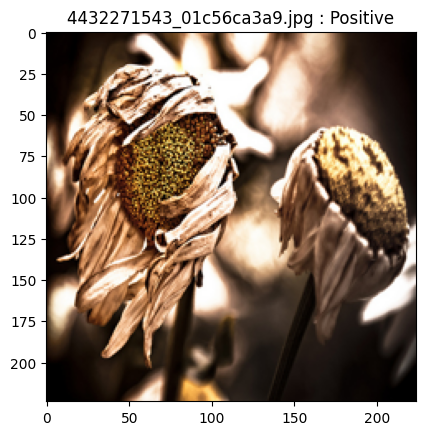

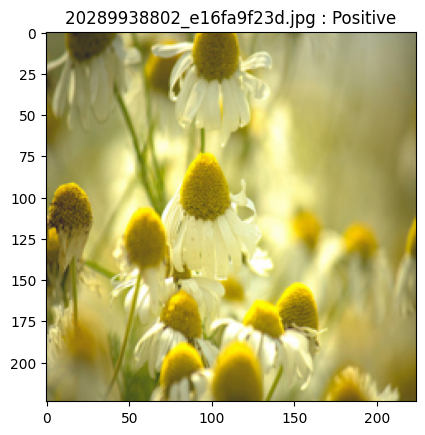

In [ ]:
# 위의 파일 리스트에서 2개씩 읽고 이미지 출력하기
for img_file in daisy_file[:2] :
    img = Image.open(daisy_path + img_file).resize((224,224))
    plt.title(img_file + ' : daisy')
    plt.imshow(img)
    plt.show()


### 4. Data Preprocess

### image_dataset_from_directory 이용하여 자동으로 이미지 데이터셋 생성, 라벨링 한꺼번에 처리 할수 있다.

In [ ]:
# 하이터 파라미터 정의
input_shape = (224, 224, 3)
batch_size = 32
num_classes = 5

In [ ]:
# 이미지 패스 지정
img_path ='/root/.keras/datasets/flower_photos/'

In [ ]:
# image_dataset_from_directory 함수 활용하여
# 이미지 폴더 밑의 이미지들에 대해 원핫인코딩된 labeling수행, 이미지 배치, 셔플 수행

# Train Dataset 만들기
train_ds = tf.keras.preprocessing. [칸 채우기] (
                                             directory=img_path,
                                             label_mode="categorical",   # binary , categorical
                                             batch_size=batch_size,
                                             image_size=(224, 224),      # 사이즈 확인
                                             seed=42,
                                             shuffle=True,
                                             validation_split=0.2,
                                             subset="training"    # One of "training" or "validation". Only used if validation_split is set.
                                            )

# Test Dataset 만들기
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                             directory=img_path,
                                             label_mode="categorical",   # binary , categorical
                                             batch_size=batch_size,
                                             image_size=(224, 224),      # 사이즈 확인
                                             seed=42,
                                             validation_split=0.2,
                                             subset="validation"    # One of "training" or "validation". Only used if validation_split is set.
                                            )

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
# Class 이름 확인
train_ds.class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
# 40,000건 중에서 32,000건 Train 사용. test용으로 8,000건 사용
len(train_ds) * 32 , len(test_ds) * 32

(2944, 736)

In [ ]:
batch_img, batch_label = next(iter(train_ds))
batch_img.shape, batch_label.shape

(TensorShape([32, 224, 224, 3]), TensorShape([32, 5]))

(224, 224, 3)


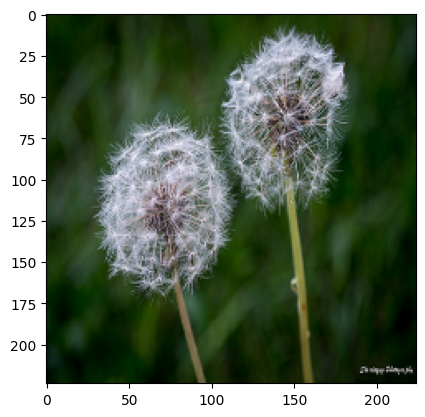

In [ ]:
# 샘플 이미지 확인

i = 0
for batch_img, batch_label in train_ds.take(1):
  if i == 0 :
    print(batch_img[i].shape)
    plt.imshow(batch_img[i]/255)
  i = i + 1


## B. 모델링

### 1. Build Model

In [ ]:
# Hyperparameter Tunning

num_epochs = 10
batch_size = 32

learning_rate = 0.001
dropout_rate = 0.5

input_shape = (224, 224, 3)  # 사이즈 확인
num_classes = 5

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Rescaling

model = [칸 채우기] ()
model.add( [칸 채우기] (1. / 255))  # 이미지 Rescaling. 없이 하면 성능이 안나옴.
model.add( [칸 채우기] (32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=input_shape))
model.add( [칸 채우기] (pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(64,(2,2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation=' [칸 채우기] '))

In [ ]:
# Model compile
model. [칸 채우기] (optimizer=tf.keras.optimizers.Adam(learning_rate),  # Optimization
              loss='categorical_crossentropy',  # Loss Function
              metrics=['accuracy'])  # Metrics / Accuracy

### 2. Callback

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# EarlyStopping
es = [칸 채우기] (monitor='val_loss', mode='min', verbose=1, patience=3)

# ModelCheckpoint
checkpoint_path = "my_checkpoint.ckpt"
checkpoint = [칸 채우기] (filepath=checkpoint_path,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=1)

### 3. 모델 학습

In [ ]:
# image_dataset_from_directory 이용하여 데이터 만들었을때 아래와 같이 학습 진행
# num_epochs = 10

# 모델 학습(fit)
history = model. [칸 채우기] (
    train_ds,
    validation_data=(test_ds),
    epochs=10,
    callbacks=[es, checkpoint]
)

Epoch 1/10
92/92 [==============================] - ETA: 0s - loss: 1.7130 - accuracy: 0.3355
Epoch 1: val_loss improved from inf to 1.29593, saving model to my_checkpoint.ckpt
92/92 [==============================] - 20s 172ms/step - loss: 1.7130 - accuracy: 0.3355 - val_loss: 1.2959 - val_accuracy: 0.4414
Epoch 2/10
92/92 [==============================] - ETA: 0s - loss: 1.1961 - accuracy: 0.5068
Epoch 2: val_loss improved from 1.29593 to 1.02750, saving model to my_checkpoint.ckpt
92/92 [==============================] - 11s 117ms/step - loss: 1.1961 - accuracy: 0.5068 - val_loss: 1.0275 - val_accuracy: 0.5804
Epoch 3/10
92/92 [==============================] - ETA: 0s - loss: 0.9730 - accuracy: 0.6087
Epoch 3: val_loss improved from 1.02750 to 0.98189, saving model to my_checkpoint.ckpt
92/92 [==============================] - 11s 119ms/step - loss: 0.9730 - accuracy: 0.6087 - val_loss: 0.9819 - val_accuracy: 0.5995
Epoch 4/10
92/92 [==============================] - ETA: 0s - los

### 4. 성능 그래프

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

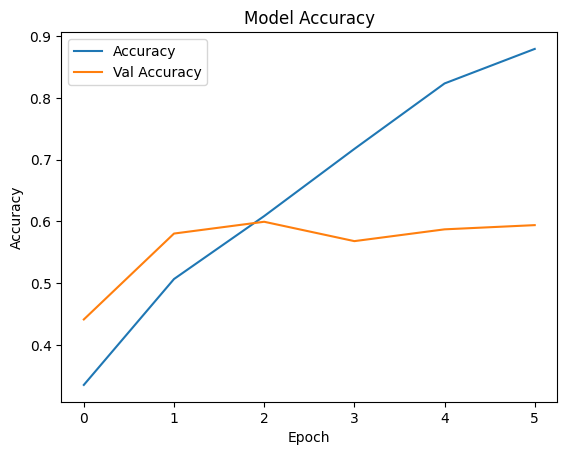

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

### 5. Predict

In [ ]:
len(test_ds) * 32

736

In [ ]:
# 배치사이즈 이미지/라벨 가져오기
batch_img , batch_label = next(iter(test_ds))
type(batch_img), batch_img.shape

(tensorflow.python.framework.ops.EagerTensor, TensorShape([32, 224, 224, 3]))

In [ ]:
# Test 데이터로 성능 예측하기

i = 1
plt.figure(figsize=(16, 30))
for img, label in list(zip(batch_img, batch_label)):
    pred = model.predict(img.numpy().reshape(-1, 224,224,3), verbose=0)
    pred_t = np.argmax(pred)
    plt.subplot(8, 4, i)
    plt.title(f'True Value:{np.argmax(label)}, Pred Value: {pred_t}')
    plt.imshow(img/255)  # 이미지 픽셀값들이 실수형이므로 0~1 사이로 변경해야 에러 안남
    i = i + 1


## 배운 내용 정리
1. DataSet을 만들기 위해 많은 수작업(파일 읽어오기, Pipeline(map, cache, batch, shuffle, prefetch), 라벨 코딩등) 필요
2. 이런 수작업을 케라스 image_dataset_from_directory 이용하여 한번에 처리할수 있습니다.
3. 여러분은 image_dataset_from_directory 와 같은 필요한 함수들을 필요에 따라 잘 사용하시면 되겠습니다.

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## E. MobileNet Transfer Learning & Fine-tuning 모델링

### 1. Build Model

In [ ]:
# 케라스 applicatioins에 어떤 종류의 모델 있는지 확인
dir(tf.keras.applications)

['ConvNeXtBase',
 'ConvNeXtLarge',
 'ConvNeXtSmall',
 'ConvNeXtTiny',
 'ConvNeXtXLarge',
 'DenseNet121',
 'DenseNet169',
 'DenseNet201',
 'EfficientNetB0',
 'EfficientNetB1',
 'EfficientNetB2',
 'EfficientNetB3',
 'EfficientNetB4',
 'EfficientNetB5',
 'EfficientNetB6',
 'EfficientNetB7',
 'EfficientNetV2B0',
 'EfficientNetV2B1',
 'EfficientNetV2B2',
 'EfficientNetV2B3',
 'EfficientNetV2L',
 'EfficientNetV2M',
 'EfficientNetV2S',
 'InceptionResNetV2',
 'InceptionV3',
 'MobileNet',
 'MobileNetV2',
 'MobileNetV3Large',
 'MobileNetV3Small',
 'NASNetLarge',
 'NASNetMobile',
 'RegNetX002',
 'RegNetX004',
 'RegNetX006',
 'RegNetX008',
 'RegNetX016',
 'RegNetX032',
 'RegNetX040',
 'RegNetX064',
 'RegNetX080',
 'RegNetX120',
 'RegNetX160',
 'RegNetX320',
 'RegNetY002',
 'RegNetY004',
 'RegNetY006',
 'RegNetY008',
 'RegNetY016',
 'RegNetY032',
 'RegNetY040',
 'RegNetY064',
 'RegNetY080',
 'RegNetY120',
 'RegNetY160',
 'RegNetY320',
 'ResNet101',
 'ResNet101V2',
 'ResNet152',
 'ResNet152V2',
 'Re

In [ ]:
# 사전 훈련된 모델 MobileNetV2에서 기본 모델을 생성합니다.
# 아래와 같은 형식을 MobileNetV2 Transfer Learning 사용하며 됩니다.

base_model = tf.keras.applications. [칸 채우기] (input_shape=(224, 224, 3), weights='imagenet', include_top=False)

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
# tf.keras.applications.MobileNetV2 모델은 [-1, 1]의 픽셀 값을 예상하지만 이 시점에서 이미지의 픽셀 값은 [0, 255]입니다.
# MobileNetV2 모델에서 제대로 수행하기 위해 크기를 [-1, 1]로 재조정해야 합니다.(안하고 수행해도 성능 잘 나옴)
# 방법 2가지 있음
# 첫번째 방법 : preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
# 두번째 방법 : rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [ ]:
# MobileNet V2 베이스 모델 고정하기
base_model.trainable = False

In [ ]:
# 모델 구축 : 이미지 픽셀값 조정 수행하기(Rescaling) --> 성능 더 잘 나옴.

inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.layers. [칸 채우기] (1./127.5, offset=-1)(inputs)
x = base_model(x, training=False)
x = tf.keras.layers. [칸 채우기] ()(x)  # 3차원(7, 7, 1280) --> 1차원(1280)으로 줄이기 : GlobalAveragePooling2D
output = tf.keras.layers.Dense(5, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_4 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02

In [ ]:
# 모델 compile

model. [칸 채우기] (optimizer=tf.keras.optimizers.Adam(learning_rate),  # Optimization
              loss='categorical_crossentropy',  # Loss Function
              metrics=['accuracy'])             # Metrics / Accuracy

### 2. Callback

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# EarlyStopping
es = [칸 채우기] (monitor='val_loss', mode='min', verbose=1, patience=3)

# ModelCheckpoint
checkpoint_path = "my_checkpoint.ckpt"
checkpoint = [칸 채우기] (filepath=checkpoint_path,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=1)

### 3. 모델 학습

In [ ]:
# image_dataset_from_directory 이용하여 DataSet을 만들었으며
# num_epochs = 10
# batch_size = 32

history = model.fit(
    train_ds,
    validation_data = test_ds,
    epochs=2,
    callbacks=[es, checkpoint]
)

Epoch 1/2
92/92 [==============================] - ETA: 0s - loss: 0.7559 - accuracy: 0.7265
Epoch 1: val_loss improved from inf to 0.49343, saving model to my_checkpoint.ckpt
92/92 [==============================] - 30s 276ms/step - loss: 0.7559 - accuracy: 0.7265 - val_loss: 0.4934 - val_accuracy: 0.8297
Epoch 2/2
91/92 [============================>.] - ETA: 0s - loss: 0.3692 - accuracy: 0.8733
Epoch 2: val_loss improved from 0.49343 to 0.42665, saving model to my_checkpoint.ckpt
92/92 [==============================] - 26s 281ms/step - loss: 0.3691 - accuracy: 0.8733 - val_loss: 0.4266 - val_accuracy: 0.8460


### 4. 성능 그래프

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

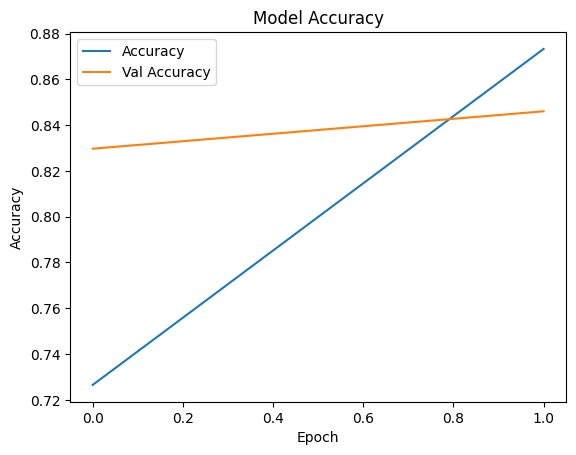

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

### 5. Predict

In [ ]:
# test_generator 샘플 데이터 가져오기
# 배치 사이즈 32 확인

batch_img, batch_label = next(iter(test_ds))
print(batch_img.shape)
print(batch_label.shape)

(32, 224, 224, 3)
(32, 5)


In [ ]:
# 이미지 rescale 되어 있는 상태
batch_img[0][0][:10]

<tf.Tensor: shape=(10, 3), dtype=float32, numpy=
array([[105.3919  , 144.3919  , 203.3919  ],
       [107.66677 , 146.66676 , 203.85109 ],
       [106.      , 145.      , 201.83928 ],
       [106.10491 , 145.1049  , 201.3549  ],
       [105.60683 , 144.60683 , 203.60683 ],
       [106.175385, 145.17538 , 204.17538 ],
       [105.015945, 144.01595 , 203.01595 ],
       [107.75893 , 146.75893 , 201.75893 ],
       [107.      , 146.      , 201.      ],
       [107.      , 146.      , 201.      ]], dtype=float32)>

In [ ]:
# 100% 성능 보여줌

i = 1
plt.figure(figsize=(16, 30))
for img, label in list(zip(batch_img, batch_label)):
    pred = model.predict(img.numpy().reshape(-1, 224,224,3), verbose=0)
    pred_t = np.argmax(pred)
    plt.subplot(8, 4, i)
    plt.title(f'True Value:{np.argmax(label)}, Pred Value: {pred_t}')
    plt.imshow(img/255)  # 이미지 픽셀값들이 실수형이므로 0~1 사이로 변경해야 에러 안남
    i = i + 1

## 배운 내용 정리
1. Transfer Learning을 사용하는 방법을 배웠으며 이를 통해 성능을 올릴수 있었습니다.
2. 여러분도 Transfer Learning을 사용하는 방법을 숙지해서 이용할수 있으면 좋겠네요.